# Wrangling Data using SQLite

In [ ]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# connecting to the Nepal Earthquake Database
%reload_ext sql
%sql sqlite:///nepal.sqlite


# Exploration

In [13]:

%%sql
-- Inspecting the database 
SELECT *
FROM sqlite_schema

   sqlite:///database.db
 * sqlite:///nepal.sqlite
Done.


[('table', 'id_map', 'id_map', 2, 'CREATE TABLE "id_map" (\n"household_id" INTEGER,\n  "building_id" INTEGER,\n  "vdcmun_id" INTEGER,\n  "district_id" INTEGER\n)'),
 ('index', 'ix_id_map_household_id', 'id_map', 3, 'CREATE INDEX "ix_id_map_household_id"ON "id_map" ("household_id")'),
 ('table', 'building_structure', 'building_structure', 2032, 'CREATE TABLE "building_structure" (\n"building_id" INTEGER,\n  "count_floors_pre_eq" INTEGER,\n  "count_floors_post_eq" INTEGER,\n  "age_building" IN ... (198 characters truncated) ... or_type" TEXT,\n  "other_floor_type" TEXT,\n  "position" TEXT,\n  "plan_configuration" TEXT,\n  "condition_post_eq" TEXT,\n  "superstructure" TEXT\n)'),
 ('index', 'ix_building_structure_building_id', 'building_structure', 2033, 'CREATE INDEX "ix_building_structure_building_id"ON "building_structure" ("building_id")'),
 ('table', 'building_damage', 'building_damage', 12302, 'CREATE TABLE "building_damage" (\n"building_id" INTEGER,\n  "damage_overall_collapse" TEXT,\n  "damage_overall_leaning" TEXT,\n  "damage_overall_adja ... (2923 characters truncated) ... ndslide" INTEGER,\n  "has_geotechnical_risk_rock_fall" INTEGER,\n  "has_geotechnical_risk_flood" INTEGER,\n  "has_geotechnical_risk_other" INTEGER\n)'),
 ('index', 'ix_building_damage_building_id', 'building_damage', 12305, 'CREATE INDEX "ix_building_damage_building_id"ON "building_damage" ("building_id")'),
 ('table', 'household_demographics', 'household_demographics', 31601, 'CREATE TABLE "household_demographics" (\n"household_id" INTEGER,\n  "gender_household_head" TEXT,\n  "age_household_head" REAL,\n  "caste_household"  ... (8 characters truncated) ...  "education_level_household_head" TEXT,\n  "income_level_household" TEXT,\n  "size_household" REAL,\n  "is_bank_account_present_in_household" REAL\n)'),
 ('index', 'ix_household_demographics_household_id', 'household_demographics', 31602, 'CREATE INDEX "ix_household_demographics_household_id"ON "household_demographics" ("household_id")')]

In [14]:
%%sql
-- Getting the names of tables in the Database.
SELECT name
FROM sqlite_schema
WHERE type ="table"


   sqlite:///database.db
 * sqlite:///nepal.sqlite
Done.


name
id_map
building_structure
building_damage
household_demographics


In [15]:
%%sql
-- Exploring the id_map Table
SELECT *
FROM id_map
LIMIT 5;

   sqlite:///database.db
 * sqlite:///nepal.sqlite
Done.


household_id,building_id,vdcmun_id,district_id
5601,56,7,1
6301,63,7,1
9701,97,7,1
9901,99,7,1
11501,115,7,1


In [16]:
%%sql
-- getting the number of observations in the id_map table
SELECT COUNT(*) AS number_of_observations
FROM id_map


   sqlite:///database.db
 * sqlite:///nepal.sqlite
Done.


number_of_observations
249932


In [18]:
%%sql
-- Getting the distinct District_id in the id_map Table
SELECT distinct(district_id)
FROM id_map


   sqlite:///database.db
 * sqlite:///nepal.sqlite
Done.


district_id
1
2
3
4


Now lets investigate the number of houses in the id_map Table

In [19]:
%%sql
SELECT count(distinct(building_id)) AS number_of_buildings
FROM id_map

   sqlite:///database.db
 * sqlite:///nepal.sqlite
Done.


number_of_buildings
234835


For our Exploration, we'll focus on Gorkha (district 4).

In [20]:
%%sql
SELECT *
FROM id_map
WHERE district_id = 4
LIMIT 5;

   sqlite:///database.db
 * sqlite:///nepal.sqlite
Done.


household_id,building_id,vdcmun_id,district_id
16400201,164002,38,4
16408101,164081,38,4
16408901,164089,38,4
16409801,164098,38,4
16410301,164103,38,4


Extracting  observations in the id_map  from Gorkha district

In [22]:
%%sql
SELECT COUNT(*) no_observations_from_gorkha
FROM id_map
WHERE  district_id = 4

   sqlite:///database.db
 * sqlite:///nepal.sqlite
Done.


no_observations_from_gorkha
75883


 Now, lets consider  buildings in the id_map table that  are in Gorkha.

In [23]:
%%sql
SELECT count(distinct(building_id)) AS no_unique_buiding_gorkha
FROM id_map
WHERE district_id = 4

   sqlite:///database.db
 * sqlite:///nepal.sqlite
Done.


no_unique_buiding_gorkha
70836


Exloring the Building structure Table.

In [26]:
%%sql
SELECT *
FROM building_structure
LIMIT 5;

   sqlite:///database.db
 * sqlite:///nepal.sqlite
Done.


building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure
1,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
2,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar"
3,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar"
4,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar"
5,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar"


In [27]:
%%sql
-- Number of buildings in the Building structure Table
SELECT COUNT(*) AS number_of_buildings
FROM building_structure

   sqlite:///database.db
 * sqlite:///nepal.sqlite
Done.


number_of_buildings
234835


There are over 200,000 buildings in the building_structure table, but let us limit it to those that are in Gorkha.Hence we join the id-map and building_structure tables .

In [28]:
%%sql
SELECT *
FROM id_map AS i
JOIN building_structure AS b
ON i.building_id = b.building_id 
WHERE i.district_id = 4
LIMIT 5;

   sqlite:///database.db
 * sqlite:///nepal.sqlite
Done.


household_id,building_id,vdcmun_id,district_id,building_id_1,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure
16400201,164002,38,4,164002,3,3,20,560,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar"
16408101,164081,38,4,164081,2,2,21,200,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
16408901,164089,38,4,164089,3,3,18,315,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
16409801,164098,38,4,164098,2,2,45,290,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
16410301,164103,38,4,164103,2,2,21,230,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"


Now let us return the Table such that it represents each a unique building for each row .

In [30]:
%%sql
SELECT distinct(i.building_id),b.*
FROM id_map AS i 
JOIN building_structure AS b
ON i.building_id = b.building_id
WHERE i.district_id = 4
limit 5;

   sqlite:///database.db
 * sqlite:///nepal.sqlite
Done.


building_id,building_id_1,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure
164002,164002,3,3,20,560,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar"
164081,164081,2,2,21,200,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
164089,164089,3,3,18,315,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
164098,164098,2,2,45,290,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
164103,164103,2,2,21,230,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"


I combined the id_map and building_structure tables to create a table with all the buildings in Gorkha, but the final piece of data needed for our model, the damage that each building sustained in the earthquake, is in the building_damage table.

In [31]:
%%sql
SELECT distinct(i.building_id),b.*
FROM id_map AS i 
JOIN building_structure AS b
ON i.building_id = b.building_id
WHERE i.district_id = 4
limit 5;

   sqlite:///database.db
 * sqlite:///nepal.sqlite
Done.


building_id,building_id_1,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure
164002,164002,3,3,20,560,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar"
164081,164081,2,2,21,200,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
164089,164089,3,3,18,315,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
164098,164098,2,2,45,290,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
164103,164103,2,2,21,230,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"


Now the above combined table is posessed with every dinstict building from the id_map Table, all Features from the Building structure Table and the damage grade feature from the Building damage Table.

# Prepare Data

## Import

In order to expedite and simplify the cleaning process, I'll create a wrangle function. Each block of code added throughout the cleaning process will be added to the function until all cleaning has been completed.

In [67]:
def wrangle(db_path):
    # Connect to database
    conn = sqlite3.connect(db_path)
    #Construct query
    query = """
        SELECT distinct(i.building_id) AS b_id,
           s.*,
           d.damage_grade
        FROM id_map AS i
        JOIN building_structure AS s ON i.building_id = s.building_id
        JOIN building_damage AS d ON i.building_id = d.building_id
        WHERE district_id = 4
    """

    # Read query results into DataFrame
    df = pd.read_sql(query,conn,index_col="b_id")
    
    # identify leaky features
    drop_cols = [col for col in df.columns if "post_eq" in col]
    
    # create a binary target
    df["damage_grade"]= df["damage_grade"].str[-1].astype(int)
    df["severe_damage"]= (df["damage_grade"]> 3).astype(int)
    
    #drop old target
    drop_cols.append("damage_grade")
    
    # drop column on multicolinearity
    drop_cols.append("count_floors_pre_eq")
    
    #drop the column 
    df.drop(columns=drop_cols, inplace=True)
    return df

In [59]:
df = wrangle("nepal.sqlite")
df.head()

,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure,damage_grade
b_id,,,,,,,,,,,,,,,,,
164002,164002,3,3,20,560,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar",Grade 2
164081,164081,2,2,21,200,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 2
164089,164089,3,3,18,315,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 2
164098,164098,2,2,45,290,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 3
164103,164103,2,2,21,230,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 3


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70836 entries, 164002 to 234835
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   building_id             70836 non-null  int64 
 1   count_floors_pre_eq     70836 non-null  int64 
 2   count_floors_post_eq    70836 non-null  int64 
 3   age_building            70836 non-null  int64 
 4   plinth_area_sq_ft       70836 non-null  int64 
 5   height_ft_pre_eq        70836 non-null  int64 
 6   height_ft_post_eq       70836 non-null  int64 
 7   land_surface_condition  70836 non-null  object
 8   foundation_type         70836 non-null  object
 9   roof_type               70836 non-null  object
 10  ground_floor_type       70836 non-null  object
 11  other_floor_type        70836 non-null  object
 12  position                70836 non-null  object
 13  plan_configuration      70836 non-null  object
 14  condition_post_eq       70836 non-null  object
 

 We are interested in the features that produces information before the earthquake in the dataframe, but we have features from the dataframe that contains information after the earthquake.We will have to drop these columns to facilitate better model performance.

In [60]:
# Create a list of all columns that have "post_eq" information
drop_cols = []
#for col in df.columns:
#    if "post_eq" in col:
#       drop_cols.append(col)
drop_cols
# create a list comprehension
#drop_cols = [col for col in df.columns if "post_eq" in col]
#drop_cols

['count_floors_post_eq', 'height_ft_post_eq', 'condition_post_eq']

Now i'll update the wrangle function to drop these leaky features

Let us inpect the target feature (Damage Grade) to see its categories.

In [43]:
df["damage_grade"].value_counts()

Grade 5    24869
Grade 4    20650
Grade 3    14097
Grade 2     7650
Grade 1     3570
Name: damage_grade, dtype: int64

I'll divide the target "damage grade," which indicates how much damage a building experienced, into two categories since it has more than two categories because this is a binary classification task.

In [47]:
# create a binary target
#df["damage_grade"]= df["damage_grade"].str[-1].astype(int)
#df["severe_damage"]= (df["damage_grade"]> 3).astype(int)

In [48]:
print(df["severe_damage"].value_counts())

1    45519
0    25317
Name: severe_damage, dtype: int64


Now we achieved our aim lets update the wrangle function and comment out the code for binary target creation.

## Explore

Since our model will be a type of linear model, we need to make sure there's no issue with multicollinearity in our dataset

I'll Plot a correlation heatmap of the remaining numerical features in df. Since "severe_damage" will be our target, we don't need to include it in your heatmap.

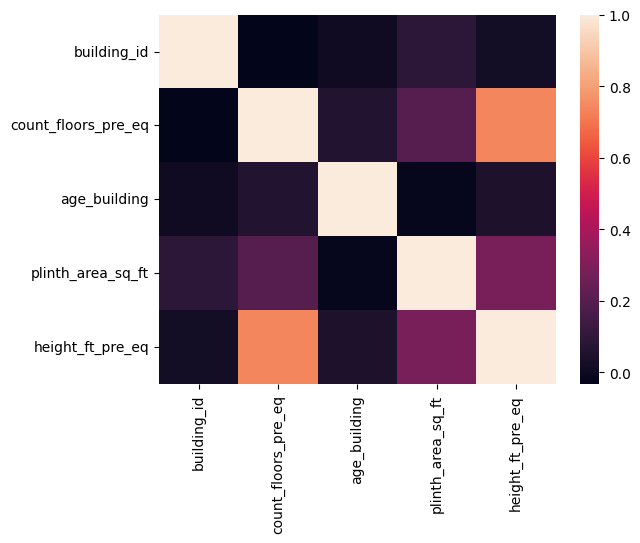

In [65]:
# Create correlation matrix
correlation = df.select_dtypes("number").drop(columns="severe_damage").corr()
# Plot heatmap of `correlation`
sns.heatmap(correlation);

From the heat map it is clear that the count_floor_pre_eq and height_ft_pre_eq are highly correlated lets ivestigate further by checking is correalation with the target variable severe_damage.

In [66]:
# comparinng correlation between tearget variable and the features 
corr_1 = df["severe_damage"].corr(df["height_ft_pre_eq"])
corr_2 = df["severe_damage"].corr(df["count_floors_pre_eq"])
print(f" correlation with relation to height is {corr_1}")
print(f" correlation with relation to count of floors is {corr_2}")


 correlation with relation to height is -0.03847659083302044
 correlation with relation to count of floors is 0.002892630372575261


Now lets update the wrangle function so it drops the "count_floors_pre_eq" column

Let's try to identify any differences that stand out between the homes that had severe damage during the earthquake (severe damage = 1) and those that did not (severe damage = 0), before we build our model. Let's move on and start with a number feature.

I'll Create a boxplot in Seaborn that displays the distributions for both groups in the "height ft pre eq" column for the "severe damage" column.

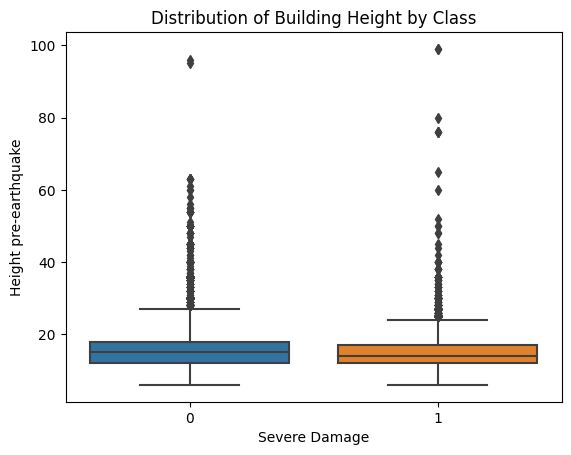

In [69]:
# Create boxplot
sns.boxplot(x="severe_damage", y="height_ft_pre_eq", data=df)
# Label axes
plt.xlabel("Severe Damage")
plt.ylabel("Height pre-earthquake")
plt.title("Distribution of Building Height by Class");

It's a good idea to look at the balance between our two classes before we continue to the dataset's numerous categorical variables. How many were severely damaged and how many weren't.

I'll now make a bar chart of the "severe damage" column's value counts. Instead of the raw count, I want to compute the relative frequencies of the classes.

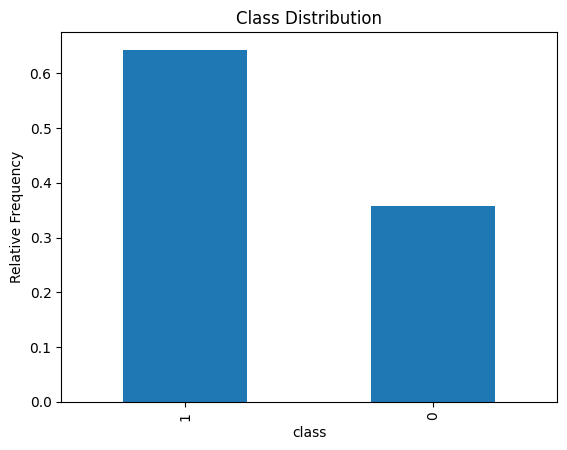

In [70]:
# Plot value counts of `"severe_damage"`
df["severe_damage"].value_counts(normalize=True).plot(
kind="bar", xlabel="class", ylabel="Relative Frequency", title="Class Distribution"
);

Now that we are aware of the dataset's majority and minority classes. The category in a binary target that happens most frequently is referred to as the majority class, while the one that appears less frequently is referred to as the minority class.

To keep the normalized value counts for the two classes in df["severe damage"],I would like to construct two variables, majority class prop and minority class prop.

In [71]:
# create two variables majority_class_prop and minority_class_prop
majority_class_prop, minority_class_prop = df["severe_damage"].value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.6425969845841097 0.3574030154158902


We want to see if certain foundation types more likely to suffer severe damage.So i'll Create a pivot table of df where the index is "foundation_type" and the values come from the "severe_damage" column, aggregated by the mean.

In [72]:
# Create pivot table
foundation_pivot = pd.pivot_table(
    df, index="foundation_type", values="severe_damage",aggfunc=np.mean
).sort_values(by="severe_damage")
foundation_pivot

,severe_damage
foundation_type,
RC,0.026224
Bamboo/Timber,0.324074
Cement-Stone/Brick,0.421908
Mud mortar-Stone/Brick,0.687792
Other,0.818898


The next visualization will be centered on How  the proportions in foundation_pivot compare to the proportions for our majority and minority classes.so i'll Plot foundation_pivot as horizontal bar chart, adding vertical lines at the values for majority_class_prop and minority_class_prop.

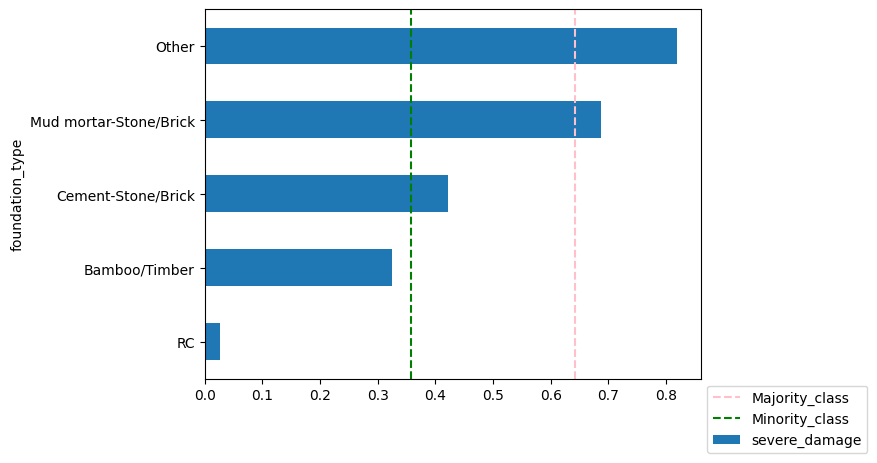

In [73]:
# Plot bar chart of `foundation_pivot`
foundation_pivot.plot(kind="barh",legend=None)
plt.axvline(
   majority_class_prop, linestyle="--", color="pink",label ="Majority_class"
)
plt.axvline(
   minority_class_prop, linestyle="--", color="green",label ="Minority_class"
)
legend = plt.legend()
legend.set_bbox_to_anchor((1.35, 0.0))


Now I'll Check the dataset for any high- or low-cardinality categorical features by combining the select dtypes and nunique procedures.

In [74]:
# Check for high- and low-cardinality categorical features
df.select_dtypes("object").nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
superstructure            11
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70836 entries, 164002 to 234835
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   building_id             70836 non-null  int64 
 1   age_building            70836 non-null  int64 
 2   plinth_area_sq_ft       70836 non-null  int64 
 3   height_ft_pre_eq        70836 non-null  int64 
 4   land_surface_condition  70836 non-null  object
 5   foundation_type         70836 non-null  object
 6   roof_type               70836 non-null  object
 7   ground_floor_type       70836 non-null  object
 8   other_floor_type        70836 non-null  object
 9   position                70836 non-null  object
 10  plan_configuration      70836 non-null  object
 11  superstructure          70836 non-null  object
 12  severe_damage           70836 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 7.6+ MB


Building id is a categorical identifier for each building in the database, although it is encoded as an integer and is not especially useful for modeling. As a result, since it is a high cardinality feature, it will be removed.

I can now start building the model.